In [145]:
import pandas as pd
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,mean_squared_error
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics




import warnings
warnings.filterwarnings('ignore')

# FLIGHT PRICE PREDICTION
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -

Time of purchase patterns (making sure last-minute purchases are expensive)
Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases) So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.
STEPS

Data Collection You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, More the data better the model In this section you have to scrape the data of flights from different websites (yatra.com, skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are airline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data.
Data Analysis After cleaning the data, you have to do some analysis on the data. Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time? What is the best time to buy so that the consumer can save the most by taking the least risk? Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are morning flights expensive?
Model Building After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like
Data Cleaning
Exploratory Data Analysis
Data Pre-processing
Model Building
Model Evaluation
Selecting the best model

In [177]:
#importing the dataset
df=pd.read_csv("Desktop/EasyMyTrip_Yatra_2023.csv")
df.head()

,Date,Airline,Source,Destination,Dep_time,Arr_time,Durtion,Route,stop,price
0,25-Jan,GO FIRST,Bangalore,Delhi,06:00,08:40,02h 40m,BLR--->DEL,non-stop,"7,487"
1,25-Jan,GO FIRST,Bangalore,Delhi,21:15,23:55,02h 40m,BLR--->DEL,non-stop,"7,487"
2,25-Jan,SpiceJet,Bangalore,Delhi,02:10,04:50,02h 40m,BLR--->DEL,non-stop,"7,488"
3,25-Jan,Indigo,Bangalore,Delhi,12:55,15:40,02h 45m,BLR--->DEL,non-stop,"7,488"
4,25-Jan,Indigo,Bangalore,Delhi,14:35,17:20,02h 45m,BLR--->DEL,non-stop,"7,488"


In [181]:
#Finding the shape of dataset
df.shape

(3068, 10)

In [182]:
#The data has 10 columns & 3068 rows

In [183]:
#Finding the null values
df.isna().sum()

Date           0
Airline        0
Source         0
Destination    0
Dep_time       0
Arr_time       0
Durtion        0
Route          0
stop           0
price          0
dtype: int64

In [184]:
#No null values are present in dataset

In [185]:
#Finding info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3068 non-null   object
 1   Airline      3068 non-null   object
 2   Source       3068 non-null   object
 3   Destination  3068 non-null   object
 4   Dep_time     3068 non-null   object
 5   Arr_time     3068 non-null   object
 6   Durtion      3068 non-null   object
 7   Route        3068 non-null   object
 8   stop         3068 non-null   object
 9   price        3068 non-null   object
dtypes: object(10)
memory usage: 239.8+ KB


In [186]:
#All are object datatype need to replcae some strings from price, time, date duration.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

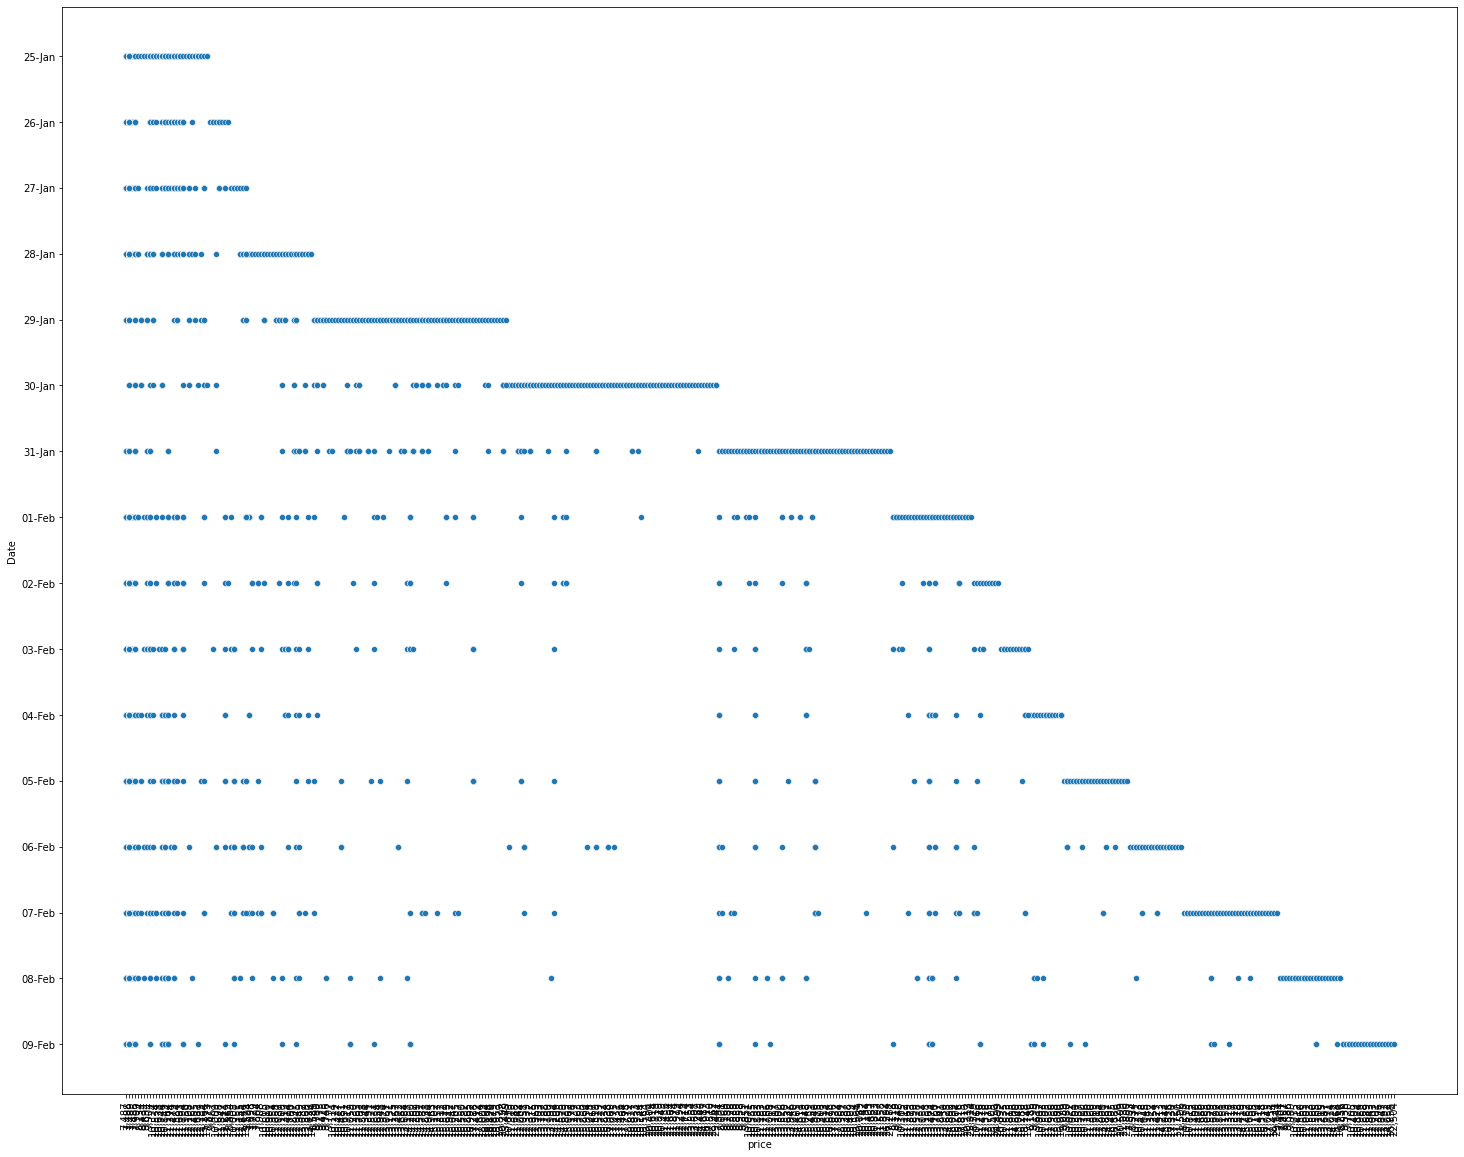

In [187]:
#Finding the departure time
plt.figure(figsize=(25,20))
sns.scatterplot(y=df["Date"],x=df["price"])
plt.xticks(rotation=(90))

In [188]:
#converting the objects to hours,minutes
df["Dep_hour"] = pd.to_datetime(df["Dep_time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_time"]).dt.minute
df.drop(["Dep_time"], axis = 1, inplace = True)

In [189]:
#converting the objects to hours, minutes
df["Arr_hour"] = pd.to_datetime(df["Arr_time"]).dt.hour
df["Arr_min"] = pd.to_datetime(df["Arr_time"]).dt.minute
df.drop(["Arr_time"], axis = 1, inplace = True)

In [190]:
df.head()

,Date,Airline,Source,Destination,Durtion,Route,stop,price,Dep_hour,Dep_min,Arr_hour,Arr_min
0,25-Jan,GO FIRST,Bangalore,Delhi,02h 40m,BLR--->DEL,non-stop,"7,487",6,0,8,40
1,25-Jan,GO FIRST,Bangalore,Delhi,02h 40m,BLR--->DEL,non-stop,"7,487",21,15,23,55
2,25-Jan,SpiceJet,Bangalore,Delhi,02h 40m,BLR--->DEL,non-stop,"7,488",2,10,4,50
3,25-Jan,Indigo,Bangalore,Delhi,02h 45m,BLR--->DEL,non-stop,"7,488",12,55,15,40
4,25-Jan,Indigo,Bangalore,Delhi,02h 45m,BLR--->DEL,non-stop,"7,488",14,35,17,20


In [191]:
#replace the h,m from the duration 
df['Durtion']=df['Durtion'].str.replace("h",':')
df['Durtion']=df['Durtion'].str.replace("m",'')
df['Durtion']=df['Durtion'].str.replace(" ",'')

#spliting the hours and minutes 
df["Dur_hour"]=df['Durtion'].str.split(':').str[0]
df["Dur_min"]=df['Durtion'].str.split(':').str[1]
df.drop(["Durtion"], axis = 1, inplace = True)

In [192]:
#removing the comma symbole form price
df['price']=df['price'].str.replace(",","")

In [193]:
df['Day']=df['Date'].str.split("-").str[0]
df['Month']=df['Date'].str.split("-").str[1]

In [194]:
df.head()

,Date,Airline,Source,Destination,Route,stop,price,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min,Day,Month
0,25-Jan,GO FIRST,Bangalore,Delhi,BLR--->DEL,non-stop,7487,6,0,8,40,02,40,25,Jan
1,25-Jan,GO FIRST,Bangalore,Delhi,BLR--->DEL,non-stop,7487,21,15,23,55,02,40,25,Jan
2,25-Jan,SpiceJet,Bangalore,Delhi,BLR--->DEL,non-stop,7488,2,10,4,50,02,40,25,Jan
3,25-Jan,Indigo,Bangalore,Delhi,BLR--->DEL,non-stop,7488,12,55,15,40,02,45,25,Jan
4,25-Jan,Indigo,Bangalore,Delhi,BLR--->DEL,non-stop,7488,14,35,17,20,02,45,25,Jan


In [195]:
#Dropping the date column
df.drop(["Date"], axis = 1, inplace = True)

In [196]:
"""
df["Dep_hour"] = pd.to_datetime(df["Dep_hour"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_min"]).dt.minute
df["Arr_hour"] = pd.to_datetime(df["Arr_hour"]).dt.hour
df["Arr_min"] = pd.to_datetime(df["Arr_min"]).dt.minute
df["Dur_hour"] = pd.to_datetime(df["Dur_hour"]).dt.hour
df["Dur_min"] = pd.to_datetime(df["Dur_min"]).dt.minute
"""

#converting to date fomate 

df["Day"] = pd.to_datetime(df.Day, format="%d").dt.day
df['Month'] =df['Month'].str.replace('Jan','01')
df['Month'] =df['Month'].str.replace('Feb','02')

In [197]:
df.head()

,Airline,Source,Destination,Route,stop,price,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min,Day,Month
0,GO FIRST,Bangalore,Delhi,BLR--->DEL,non-stop,7487,6,0,8,40,02,40,25,01
1,GO FIRST,Bangalore,Delhi,BLR--->DEL,non-stop,7487,21,15,23,55,02,40,25,01
2,SpiceJet,Bangalore,Delhi,BLR--->DEL,non-stop,7488,2,10,4,50,02,40,25,01
3,Indigo,Bangalore,Delhi,BLR--->DEL,non-stop,7488,12,55,15,40,02,45,25,01
4,Indigo,Bangalore,Delhi,BLR--->DEL,non-stop,7488,14,35,17,20,02,45,25,01


# EDA

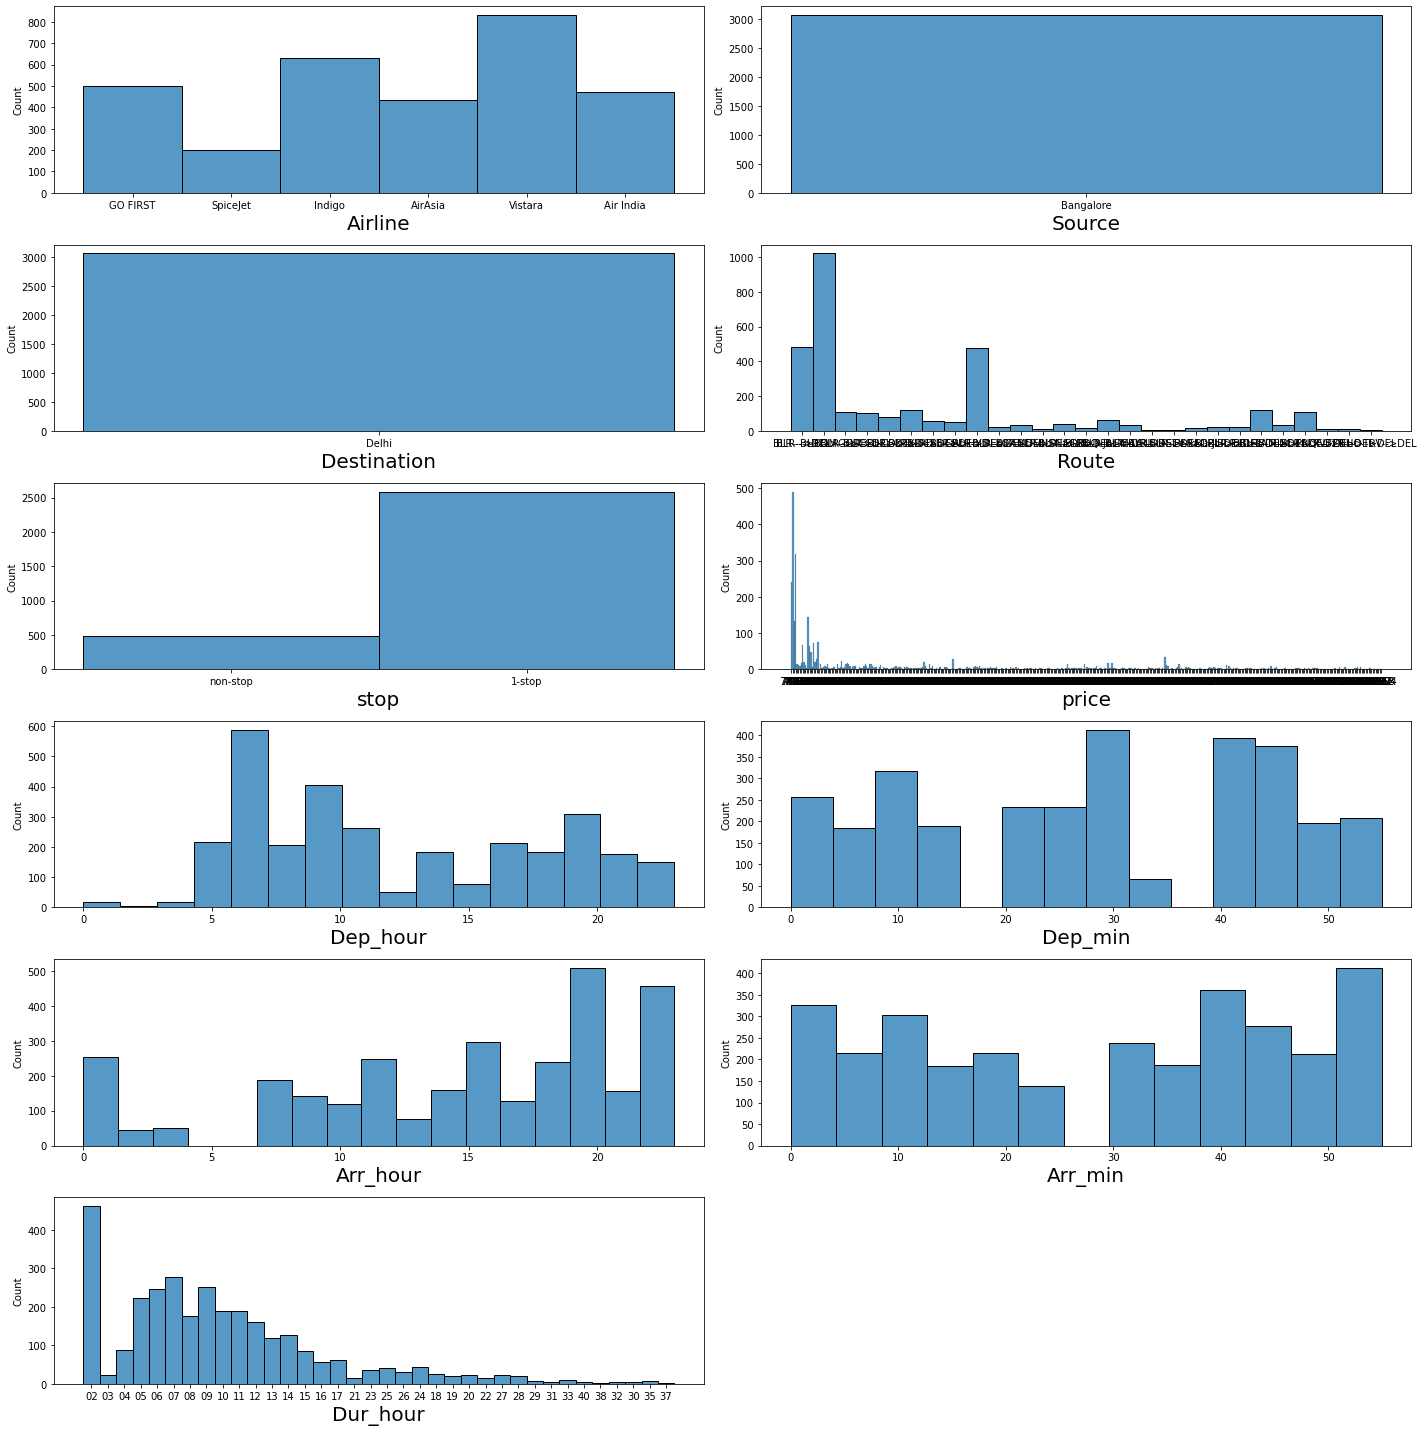

In [198]:
#Lets check data destribution, visualize the dataset

plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if plotnumber<=11:
        ax=plt.subplot(6,2, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

-Looking at the airlines columns it is observed that peoples are more preferring for Vistara Airlines, Folllowed by indigo airlines & then go first airline. Very less peoples are preferring for spicejet airline.

-We have scrapped source for Bangalore to destination Delhi.

-Non stop flights are very less in nos 500 nos, whereas 1 stop filghts are more in nos. 2500 nos.

-Mainly peoples are preferring for morning flights from 6AM to 12PM.

-Arrival hrs. are 15:00 hrs. to 24:00hrs.

-Majority 2 hr required for arrival at the destination delhi location.& in general 5 hrs to 11 hrs. required to reach at destnation. In some cases the duration time is more up to 37 hrs. this is may be due to nos. of stops.

-Price & Route we will analyse seperately.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'BLR--->DEL'),
  Text(1, 0, 'BLR--->BOM-->DEL'),
  Text(2, 0, 'BLR--->GOI-->DEL'),
  Text(3, 0, 'BLR--->CCU-->DEL'),
  Text(4, 0, 'BLR--->COK-->DEL'),
  Text(5, 0, 'BLR--->IXR-->DEL'),
  Text(6, 0, 'BLR--->IXB-->DEL'),
  Text(7, 0, 'BLR--->GAU-->DEL'),
  Text(8, 0, 'BLR--->HYD-->DEL'),
  Text(9, 0, 'BLR--->LKO-->DEL'),
  Text(10, 0, 'BLR--->AMD-->DEL'),
  Text(11, 0, 'BLR--->VNS-->DEL'),
  Text(12, 0, 'BLR--->NAG-->DEL'),
  Text(13, 0, 'BLR--->BDQ-->DEL'),
  Text(14, 0, 'BLR--->JAI-->DEL'),
  Text(15, 0, 'BLR--->MAA-->DEL'),
  Text(16, 0, 'BLR--->UDR-->DEL'),
  Text(17, 0, 'BLR--->STV-->DEL'),
  Text(18, 0, 'BLR--->SAG-->DEL'),
  Text(19, 0, 'BLR--->JLR-->DEL'),
  Text(20, 0, 'BLR--->BBI-->DEL'),
  Text(21, 0, 'BLR--->PAT-->DEL'),
  Text(22, 0, 'BLR--->IXC-->DEL'),
  Text(23, 0, 'BLR--->PNQ-->DEL'),
  Text(24, 0, 'BLR--->VTZ-->DEL'),
  Text(25, 0, '

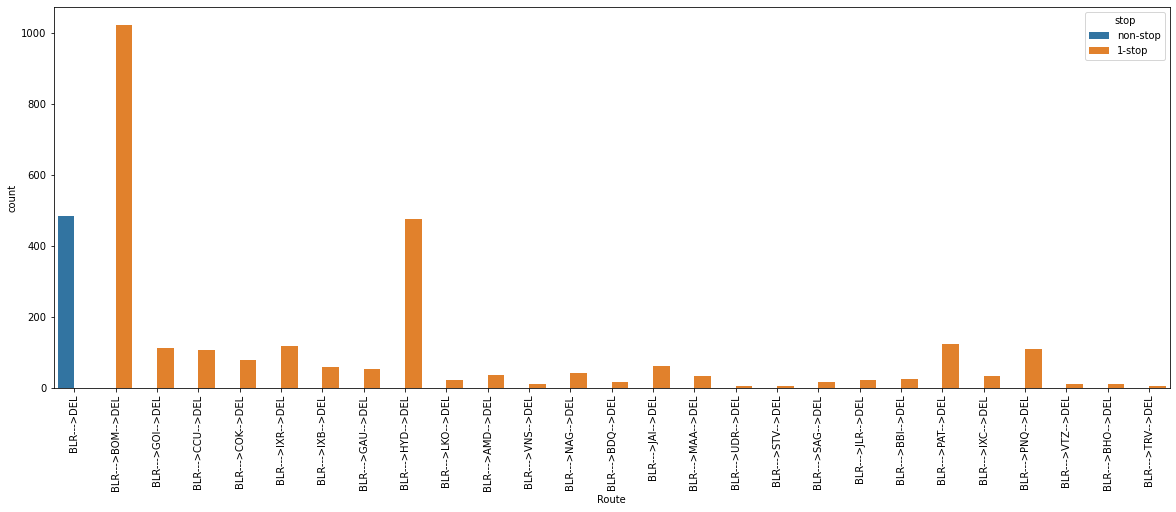

In [199]:
#Finding the route
plt.figure(figsize=(20,7))
sns.countplot(x=df["Route"], hue=df["stop"])
plt.xticks(rotation=(90))

In [200]:
#Most of the flight routes are via Bangalore to Bombay & Bombay to delhi.
#Followed by Bangalore to Hyderabad & Hyderabad to Delhi.
#Some flights are direct flights with no stop.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '02'),
  Text(1, 0, '03'),
  Text(2, 0, '04'),
  Text(3, 0, '05'),
  Text(4, 0, '06'),
  Text(5, 0, '07'),
  Text(6, 0, '08'),
  Text(7, 0, '09'),
  Text(8, 0, '10'),
  Text(9, 0, '11'),
  Text(10, 0, '12'),
  Text(11, 0, '13'),
  Text(12, 0, '14'),
  Text(13, 0, '15'),
  Text(14, 0, '16'),
  Text(15, 0, '17'),
  Text(16, 0, '21'),
  Text(17, 0, '23'),
  Text(18, 0, '25'),
  Text(19, 0, '26'),
  Text(20, 0, '24'),
  Text(21, 0, '18'),
  Text(22, 0, '19'),
  Text(23, 0, '20'),
  Text(24, 0, '22'),
  Text(25, 0, '27'),
  Text(26, 0, '28'),
  Text(27, 0, '29'),
  Text(28, 0, '31'),
  Text(29, 0, '33'),
  Text(30, 0, '40'),
  Text(31, 0, '38'),
  Text(32, 0, '32'),
  Text(33, 0, '30'),
  Text(34, 0, '35'),
  Text(35, 0, '37')])

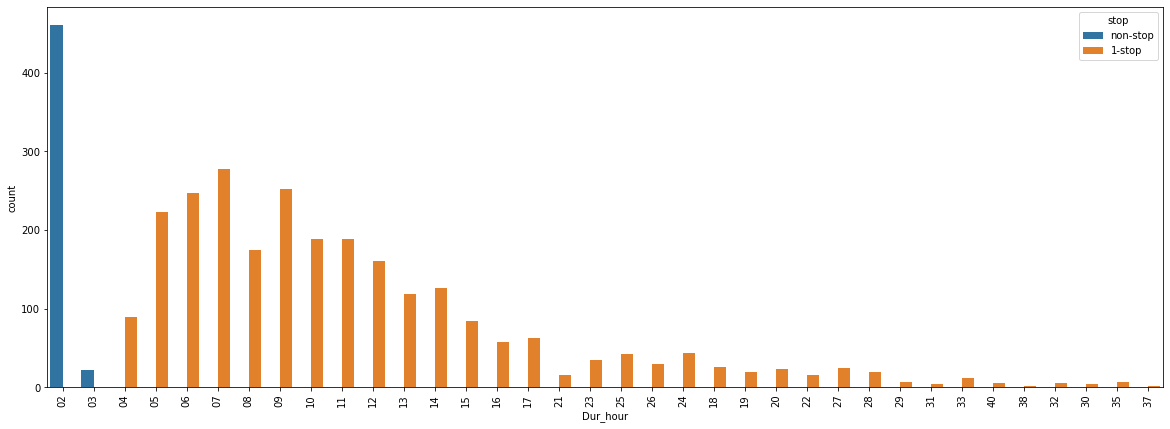

In [201]:
#Finding the No. of stops Vs duration
plt.figure(figsize=(20,7))
sns.countplot(x=df["Dur_hour"], hue=df["stop"])
plt.xticks(rotation=(90))


In [202]:
#The flights are direct flights are taking 2 hrs duration to reach t destination.
#In General flights who is having 1 stop are taking five to 14 hrs to reach at the destination.

<AxesSubplot:xlabel='Airline', ylabel='count'>

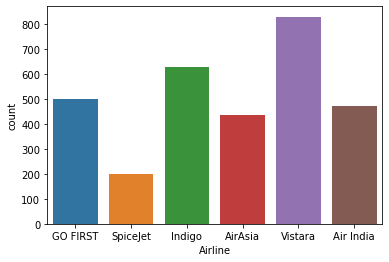

In [204]:
sns.countplot(df["Airline"])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

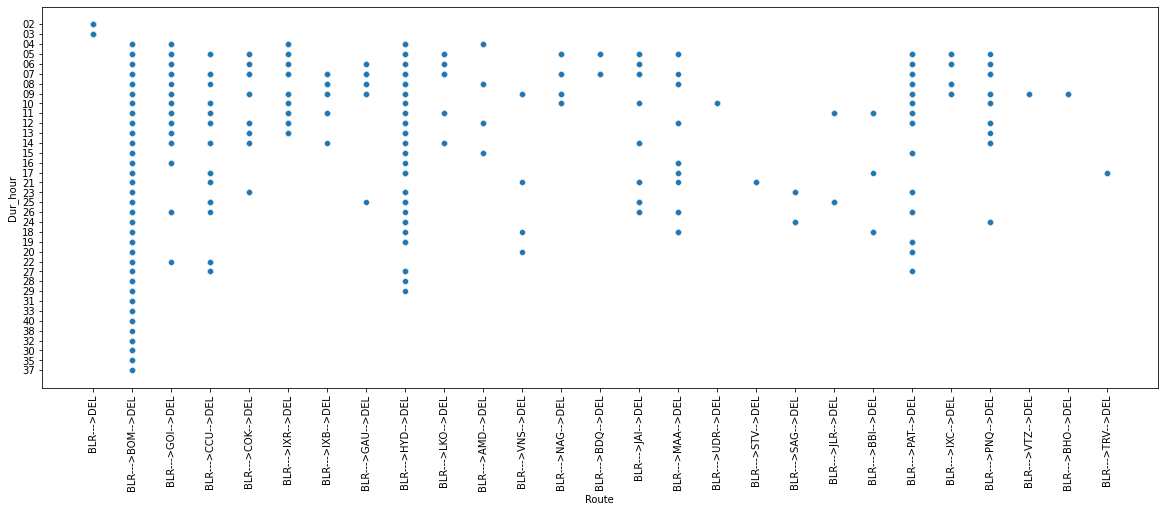

In [205]:
#Validating Route VS Duration

plt.figure(figsize=(20,7))
sns.scatterplot(x=df["Route"], y=df["Dur_hour"])
plt.xticks(rotation=(90))

In [206]:
#Generally Bangalore to Bombay & Bomay to delhi are taking large time to reach at destination.
#Follwed by Via hyderabad are taking large time.

<AxesSubplot:xlabel='price', ylabel='Density'>

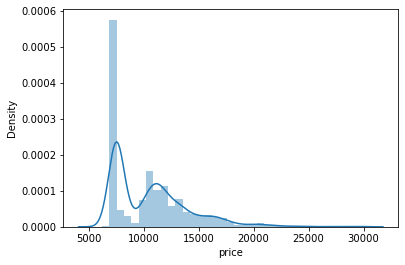

In [108]:
sns.distplot(df["price"])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

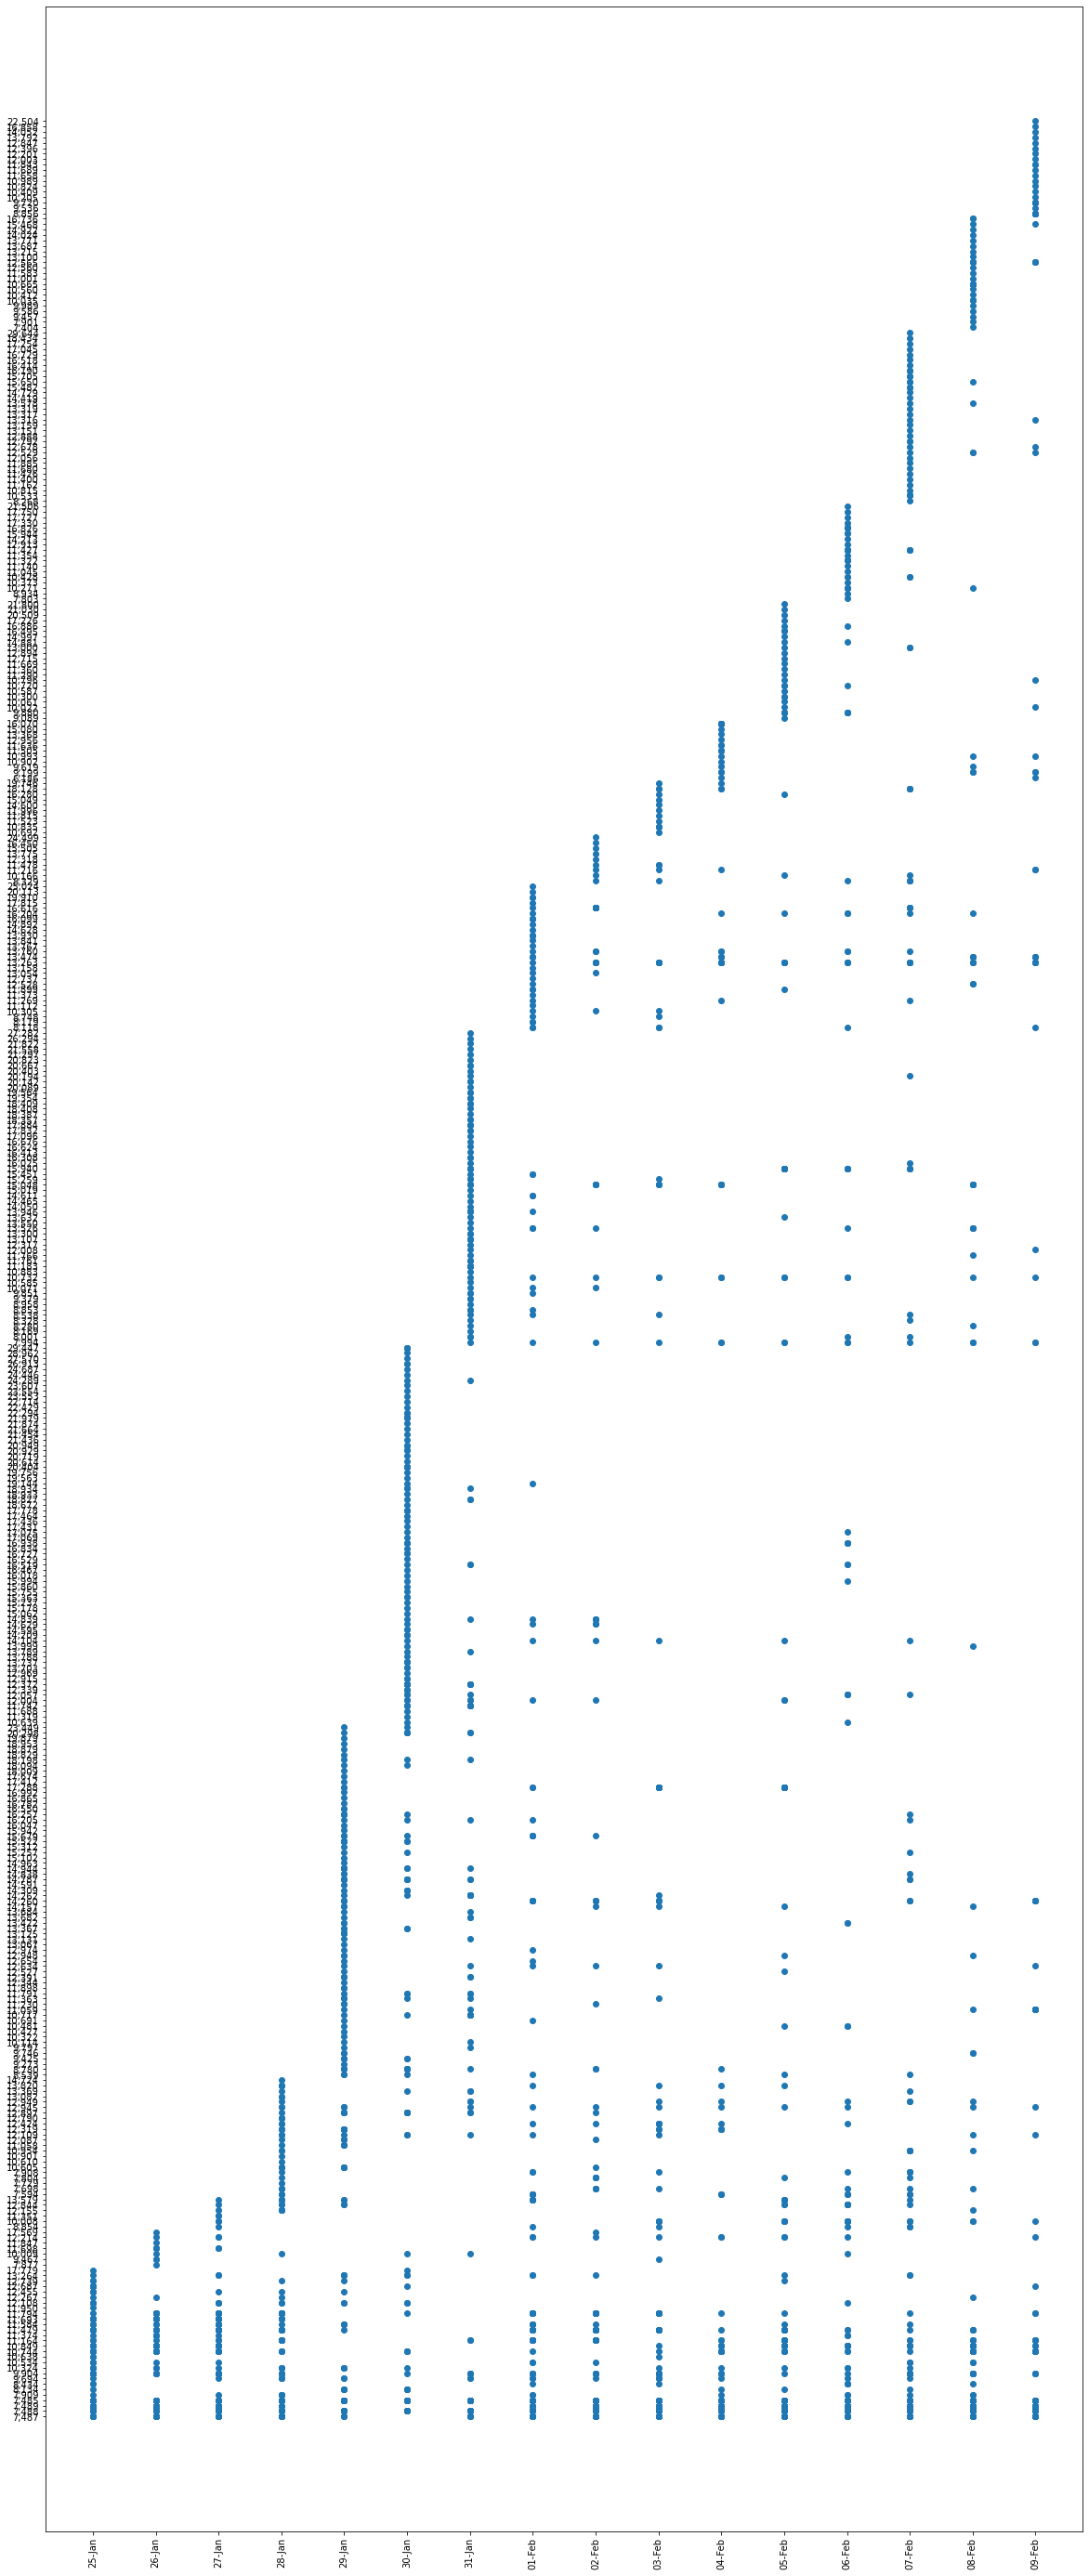

In [180]:
plt.figure(figsize=(20,50))
plt.scatter(y=df['price'],x=df['Date'])
plt.xticks(rotation=(90))

In [207]:
#Encoding the Airlines 

Airline = pd.get_dummies(df['Airline'])
Airline.head()

,Air India,AirAsia,GO FIRST,Indigo,SpiceJet,Vistara
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [208]:
Source = pd.get_dummies(df["Source"])
Source.head()

,Bangalore
0,1
1,1
2,1
3,1
4,1


In [209]:
Destination = pd.get_dummies(df["Destination"])
Destination.head()

,Delhi
0,1
1,1
2,1
3,1
4,1


In [210]:
# Replacing Stops
df.replace({"non-stop": 0, "1-stop": 1, "2-stop": 2,"3-stop":3}, inplace = True)
df['stop']=pd.to_numeric(df['stop'])

In [211]:
# Concatenate dataframe --> df + Airline + Source + Destination
df = pd.concat([df, Airline, Source, Destination], axis = 1)

df.drop(["Airline"], axis = 1, inplace = True)

In [212]:
df.head()

,Source,Destination,Route,stop,price,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,...,Day,Month,Air India,AirAsia,GO FIRST,Indigo,SpiceJet,Vistara,Bangalore,Delhi
0,Bangalore,Delhi,BLR--->DEL,0,7487,6,0,8,40,02,...,25,01,0,0,1,0,0,0,1,1
1,Bangalore,Delhi,BLR--->DEL,0,7487,21,15,23,55,02,...,25,01,0,0,1,0,0,0,1,1
2,Bangalore,Delhi,BLR--->DEL,0,7488,2,10,4,50,02,...,25,01,0,0,0,0,1,0,1,1
3,Bangalore,Delhi,BLR--->DEL,0,7488,12,55,15,40,02,...,25,01,0,0,0,1,0,0,1,1
4,Bangalore,Delhi,BLR--->DEL,0,7488,14,35,17,20,02,...,25,01,0,0,0,1,0,0,1,1


In [213]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

In [214]:
cols=["Source","Destination"]

df[cols]=df[cols].apply(LabelEncoder().fit_transform)

df.head()

,Source,Destination,Route,stop,price,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,...,Day,Month,Air India,AirAsia,GO FIRST,Indigo,SpiceJet,Vistara,Bangalore,Delhi
0,0,0,BLR--->DEL,0,7487,6,0,8,40,02,...,25,01,0,0,1,0,0,0,1,1
1,0,0,BLR--->DEL,0,7487,21,15,23,55,02,...,25,01,0,0,1,0,0,0,1,1
2,0,0,BLR--->DEL,0,7488,2,10,4,50,02,...,25,01,0,0,0,0,1,0,1,1
3,0,0,BLR--->DEL,0,7488,12,55,15,40,02,...,25,01,0,0,0,1,0,0,1,1
4,0,0,BLR--->DEL,0,7488,14,35,17,20,02,...,25,01,0,0,0,1,0,0,1,1


In [215]:
df.drop(["Route"], axis=1, inplace=True)

In [216]:
df.head()

,Source,Destination,stop,price,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min,Day,Month,Air India,AirAsia,GO FIRST,Indigo,SpiceJet,Vistara,Bangalore,Delhi
0,0,0,0,7487,6,0,8,40,02,40,25,01,0,0,1,0,0,0,1,1
1,0,0,0,7487,21,15,23,55,02,40,25,01,0,0,1,0,0,0,1,1
2,0,0,0,7488,2,10,4,50,02,40,25,01,0,0,0,0,1,0,1,1
3,0,0,0,7488,12,55,15,40,02,45,25,01,0,0,0,1,0,0,1,1
4,0,0,0,7488,14,35,17,20,02,45,25,01,0,0,0,1,0,0,1,1


In [217]:
x=df.drop("price", axis=1)
y=df["price"]

In [218]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [219]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

Random forest model

In [220]:
#Random forest model

from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor()
Forest.fit(x_train, y_train)
y_pred = Forest.predict(x_test)
                        

In [221]:
#model traing score
Forest.score(x_train, y_train)

0.9592596695684534

In [222]:
#test score
Forest.score(x_test, y_test)

0.7206952703637516

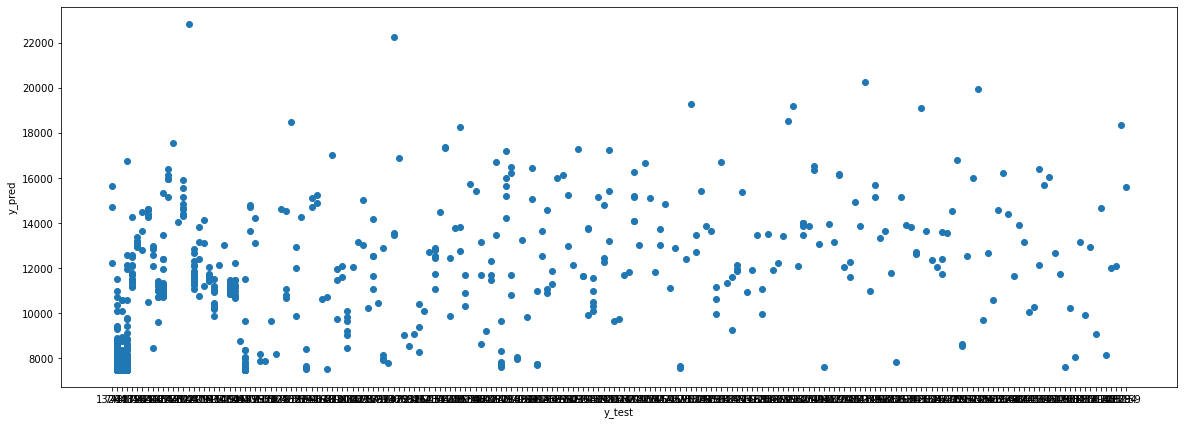

In [223]:

plt.figure(figsize=(20,7))
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [224]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score:',metrics.r2_score(y_test, y_pred))

MAE: 1013.2437157757496
MSE: 3721988.4430056065
RMSE: 1929.2455631685684
R2_score: 0.7206952703637516


In [225]:
conclusion=pd.DataFrame([Forest.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,757,758,759,760,761,762,763,764,765,766
Predicted,14729.86,7589.64,7487.0,7485.03,11158.27,13138.86,12830.32,14258.89,7521.08,8461.18,...,9955.24,7724.97,7510.23,8896.78,7496.35,14215.25,10710.34,12147.12,11496.37,16218.93
Original,13264,7488,7487,7485,11794,13263,14944,14260,7488,12945,...,12087,7487,7485,7488,7489,12565,11584,12455,11479,12108


logistic regressionModel

In [226]:
#logistic regressionModel

from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()
Logistic.fit(x_train,y_train)
l_prediction  =Logistic.predict(x_test)

In [227]:
Logistic.score(x_train,y_train)

0.489787049109083

In [228]:
Logistic.score(x_test,y_test)

0.47196870925684486

In [229]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, l_prediction))
print('MSE:', metrics.mean_squared_error(y_test, l_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, l_prediction)))
print('R2_score:',metrics.r2_score(y_test, l_prediction))

MAE: 1856.2477183833116
MSE: 13003285.295958279
RMSE: 3606.0068352622793
R2_score: 0.024210005059072448


Linear Regression model

In [230]:
from sklearn.linear_model import LinearRegression
Regressor=LinearRegression()
Regressor.fit(x_train,y_train)
pred =Regressor.predict(x_test)

In [231]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2_score:',metrics.r2_score(y_test, pred))

MAE: 2169.8930084745766
MSE: 9453485.94985819
RMSE: 3074.6521672960325
R2_score: 0.29059335412309406


In [232]:
conclusion=pd.DataFrame([Regressor.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,757,758,759,760,761,762,763,764,765,766
Predicted,12554.020833,7306.020833,10298.020833,8858.020833,10762.020833,8922.020833,10586.020833,11794.020833,7642.020833,10866.020833,...,9674.020833,9482.020833,8410.020833,11178.020833,10418.020833,13274.020833,12922.020833,12714.020833,12170.020833,11402.020833
Original,13264,7488,7487,7485,11794,13263,14944,14260,7488,12945,...,12087,7487,7485,7488,7489,12565,11584,12455,11479,12108


# Conclusion

Random forest gives good result hence it is better to use Random forest for model prediction

# Final model loading & prediction Actual Vs Predicted

In [234]:
#Saving the model in local file system 
import pickle

pickle.dump(Forest, open("rf", "wb"))

In [235]:
loaded_model=pickle.load(open("rf", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

72.06952703637516


In [236]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,757,758,759,760,761,762,763,764,765,766
Predicted,14729.86,7589.64,7487.0,7485.03,11158.27,13138.86,12830.32,14258.89,7521.08,8461.18,...,9955.24,7724.97,7510.23,8896.78,7496.35,14215.25,10710.34,12147.12,11496.37,16218.93
Original,13264,7488,7487,7485,11794,13263,14944,14260,7488,12945,...,12087,7487,7485,7488,7489,12565,11584,12455,11479,12108
